In [3]:
from vega_datasets import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

## Acquire the sf_temps dataset from vega_datasets

In [2]:
# Store the dataframe into a variable
sf_temps = data.sf_temps()

In [3]:
sf_temps

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [4]:
sf_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
# Set the date/time column as the index.
sf_temps = sf_temps.set_index('date').sort_index()

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
sf_temps.resample('d').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

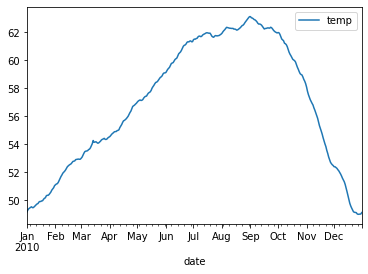

In [134]:
sf_temps.resample('d').mean().plot()

### 2. Write the code necessary to visualize the minimum temperature over time.

In [7]:
sf_temps.resample('d').min()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


<AxesSubplot:xlabel='date'>

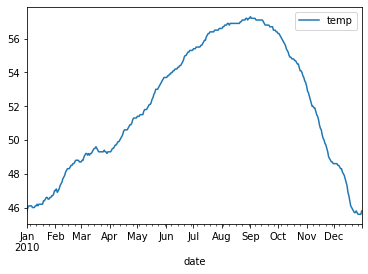

In [135]:
sf_temps.resample('d').min().plot()

### 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

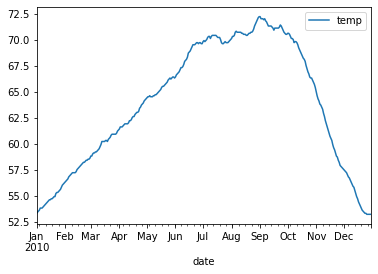

In [136]:
sf_temps.resample('d').max().plot()

### 4. Which month is the coldest, on average?

In [9]:
sf_temps.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


### 5. Which month has the highest average temperature?


In [10]:
sf_temps.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [11]:
min_max = sf_temps.resample('d').agg(['min','max'])

In [ ]:
min_max['max_min_dff'] = min_max.temp['max'] - min_max.temp['min']

In [138]:
min_max.resample('M').max()

temp       max_min_dff
             min   max            
date                              
2010-01-31  47.0  56.2         9.3
2010-02-28  48.8  58.6         9.9
2010-03-31  49.6  61.3        12.0
2010-04-30  51.3  64.3        13.0
2010-05-31  53.7  66.4        13.1
2010-06-30  55.3  69.7        14.8
2010-07-31  56.6  70.4        14.8
2010-08-31  57.2  72.2        15.0
2010-09-30  57.3  72.2        14.9
2010-10-31  56.3  70.6        14.4
2010-11-30  53.2  65.0        11.8
2010-12-31  48.6  57.5         8.9

### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

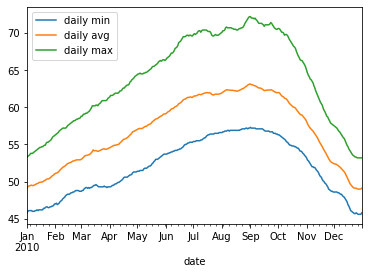

In [157]:
sf_temps.resample('d').min().temp.plot(label='daily min')
sf_temps.resample('d').mean().temp.plot(label='daily avg')
sf_temps.resample('d').max().temp.plot(label='daily max')
plt.legend()

# Seattle Weather Dataset

### 1. Which year and month combination has the highest amount of precipitation?

In [35]:
seattle = data.seattle_weather().set_index('date').sort_index()

In [39]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


In [51]:
seattle.head(31)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain
2012-01-07,0.0,7.2,2.8,2.3,rain
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-09,4.3,9.4,5.0,3.4,rain


In [289]:
seattle.resample('M').sum().precipitation.sort_values().tail(5)

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

In [64]:
seattle.resample('Y').max()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,54.1,34.4,18.3,9.5,sun
2013-12-31,43.4,33.9,18.3,8.8,sun
2014-12-31,46.7,35.6,17.8,8.8,sun
2015-12-31,55.9,35.0,18.3,8.0,sun


### 2. Visualize the amount of monthly precipitation over time.


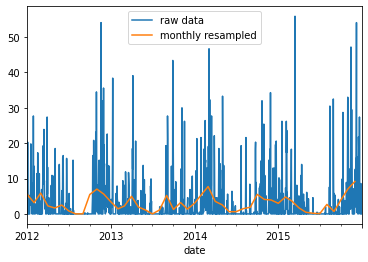

In [94]:
seattle.precipitation.plot(label = 'raw data');
seattle.resample('M').mean().precipitation.plot(label = 'monthly resampled');
plt.legend()

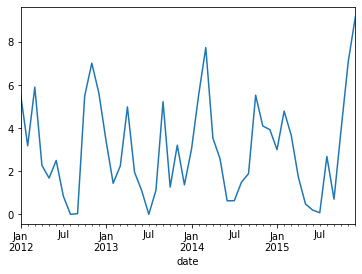

In [98]:
seattle.resample('M').mean().precipitation.plot(label = 'monthly resampled');

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

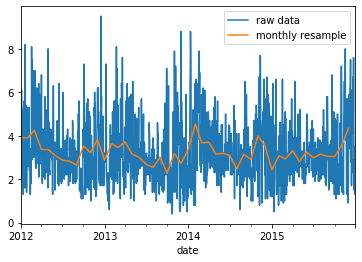

In [292]:
seattle.wind.plot(label = 'raw data')
seattle.resample('M').mean().wind.plot(label='monthly resample')
plt.legend()

In [293]:
seattle.wind.resample('M').mean().sort_values().tail(5)

date
2012-02-29    3.903448
2014-11-30    3.983333
2012-03-31    4.248387
2015-12-31    4.341935
2014-02-28    4.528571
Name: wind, dtype: float64

### 4. Which year-month combination is the windiest?

In [129]:
seattle.resample('M').mean().wind.max()

4.5285714285714285

### 5. What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [143]:
seattle[seattle['weather'] == 'sun'].resample('Y').weather.count()

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

### 6. In which month does it rain the most?

In [294]:
seattle['month'] = seattle.index.month

In [296]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
2012-01-02,10.9,10.6,2.8,4.5,rain,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1


In [297]:
seattle.groupby('month').precipitation.sum().sort_values()

month
7      48.2
6     132.9
8     163.7
5     207.5
9     235.5
4     375.4
2     422.0
1     466.0
10    503.4
3     606.2
12    622.7
11    642.5
Name: precipitation, dtype: float64

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [160]:
seattle[seattle['precipitation'] != 0].resample('M').count()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,22,22,22,22,22
2012-02-29,19,19,19,19,19
2012-03-31,22,22,22,22,22
2012-04-30,17,17,17,17,17
2012-05-31,10,10,10,10,10
2012-06-30,14,14,14,14,14
2012-07-31,7,7,7,7,7
2012-08-31,0,0,0,0,0
2012-09-30,3,3,3,3,3


# Flights Dataset

### 1. Convert any negative delays to 0.

In [161]:
flights = data.flights_20k()

In [166]:
flights = flights.set_index('date').sort_index()

In [182]:
flights

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,-5,318,FLL,JAX
2001-03-31 21:05:00,-1,451,MCI,IND


In [214]:
flights['delay'] = np.where(flights.delay > 0, flights.delay, 0)

In [215]:
flights

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND


### 2. Which hour of the day has the highest average delay?

In [248]:
flights

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND


In [234]:
flights.resample('H').mean().max()

delay       360.000
distance    887.375
dtype: float64

In [235]:
flights[flights['delay'] == 360]

,delay,distance,origin,destination
date,,,,
2001-02-23 03:25:00,360,239,DAL,HOU


### 3. Does the day of the week make a difference in the delay amount?

In [253]:
flights['day'] = flights.index.strftime('%A')

In [254]:
flights

,delay,distance,origin,destination,day
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,Monday
2001-01-01 06:30:00,0,251,MDW,STL,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,Monday
...,...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU,Saturday
2001-03-31 21:05:00,0,318,FLL,JAX,Saturday
2001-03-31 21:05:00,0,451,MCI,IND,Saturday


In [258]:
flights.groupby('day').mean()

,delay,distance
day,,
Friday,17.757596,501.118230
Monday,7.165772,505.032215
Saturday,8.431498,550.889031
Sunday,10.413542,507.987758
Thursday,12.821322,485.175025
Tuesday,9.410866,496.021732
Wednesday,11.032478,501.009094


### 4. Does the month make a difference in the delay amount?

In [261]:
flights['month'] = flights.index.strftime('%B')

In [298]:
flights.groupby('month').delay.mean()

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

# Bonus: Iowa Electricity Dataset

### 1. For each row, calculate the percentage of the year's total that energy source provided.


In [4]:
iowa = data.iowa_electricity()

In [7]:
iowa.date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [13]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2001-01-01 to 2017-01-01
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          51 non-null     object
 1   net_generation  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [9]:
iowa = iowa.set_index('year').sort_index()

In [15]:
# what is total generation by year?
yearly_sum = iowa.net_generation.resample('YS').sum()
yearly_sum

year
2001-01-01    40651
2002-01-01    42528
2003-01-01    42107
2004-01-01    43236
2005-01-01    44145
2006-01-01    45473
2007-01-01    49778
2008-01-01    53086
2009-01-01    51859
2010-01-01    57509
2011-01-01    56371
2012-01-01    56675
2013-01-01    56670
2014-01-01    56854
2015-01-01    56653
2016-01-01    54381
2017-01-01    56476
Freq: AS-JAN, Name: net_generation, dtype: int64

In [17]:
iowa.groupby('source').sum()

,net_generation
source,
Fossil Fuels,620129
Nuclear Energy,80103
Renewables,164220


# Bonus: San Francisco Temperatures Dataset

### 1. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [19]:
sf = data.sf_temps()  # hot: 35, cold: -5, cool: 15, warm:25

In [44]:
# Create a function that converts farenheit to celcius
def convert_f_to_c(farenheit):
    celcius = [(temp - 32) * 5/9 for temp in farenheit]
    return celcius

In [45]:
convert_f_to_c([1,3,5,3,4])

[-17.22222222222222,
 -16.11111111111111,
 -15.0,
 -16.11111111111111,
 -15.555555555555555]

In [46]:
sf.temp.apply(convert_f_to_c(sf.temp))

ValueError: no results

In [22]:
sf.set_index('date').sort_index()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [23]:
sf.describe()

,temp
count,8759.000000
mean,56.924112
std,6.107079
min,45.600000
25%,52.300000
50%,56.500000
75%,60.700000
max,72.200000
